In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("C:/Users/Administrator/Downloads/heart-2.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.duplicated().sum()

723

In [16]:
df=df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7377049180327869

Confusion Matrix:
 [[25  7]
 [ 9 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76        32
           1       0.74      0.69      0.71        29

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



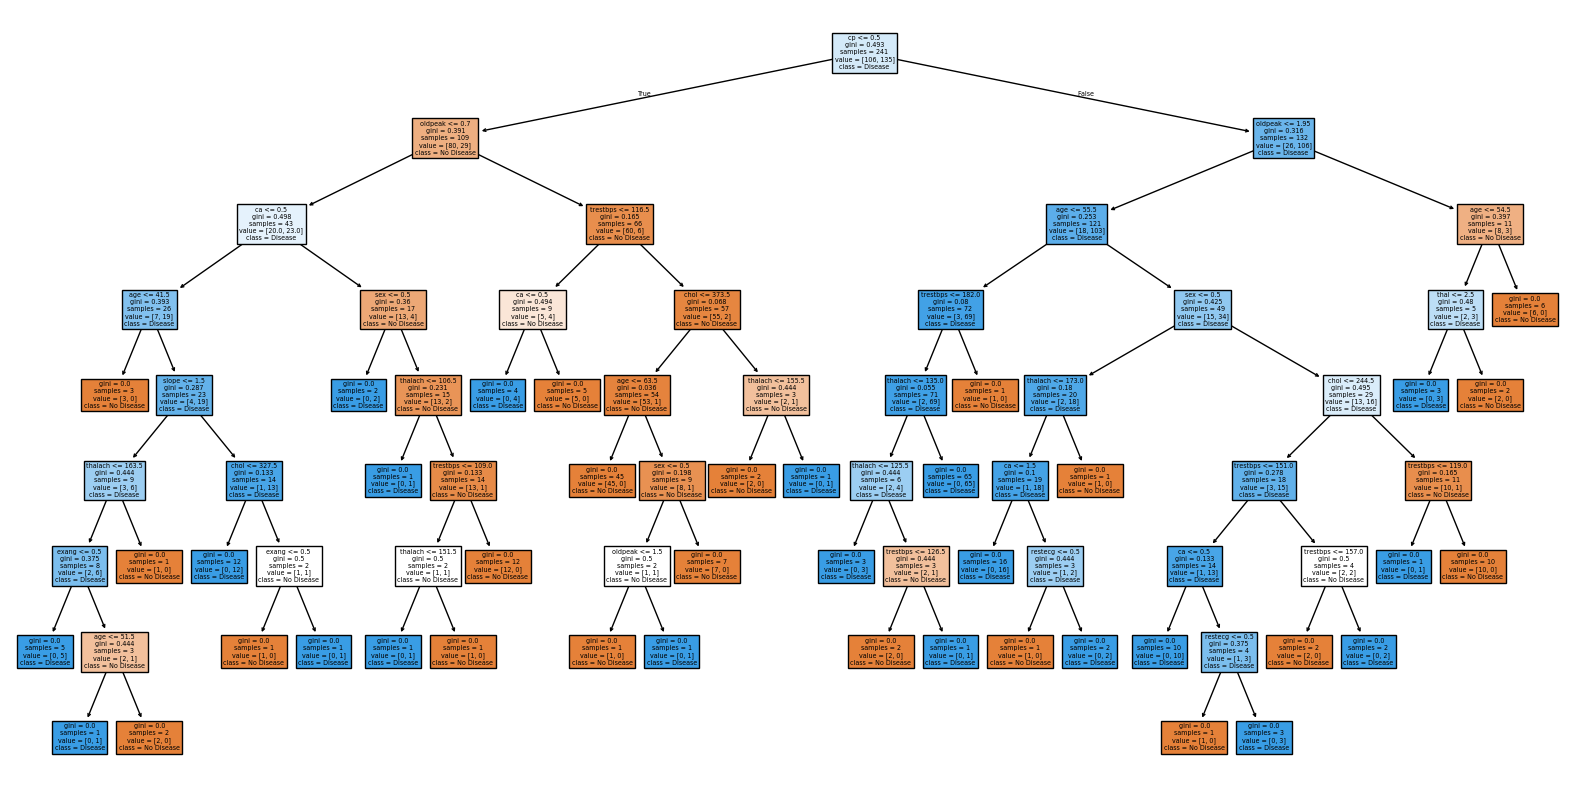

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.show()

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:\n", grid_search.best_params_)
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Hyperparameters:
 {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}

Test Accuracy: 0.7540983606557377

Confusion Matrix:
 [[26  6]
 [ 9 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.78        32
           1       0.77      0.69      0.73        29

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



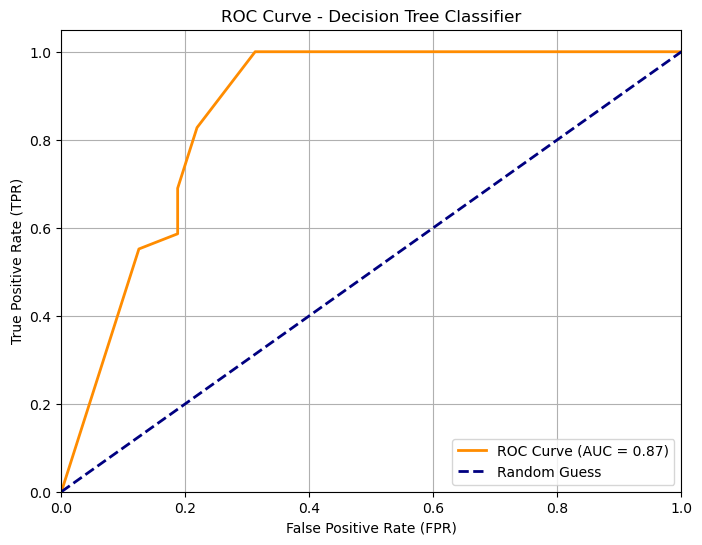

AUC Score: 0.8669


In [28]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print(f"AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logreg = LogisticRegression(max_iter=1000) 
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8032786885245902
Confusion Matrix:
 [[23  9]
 [ 3 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       0.74      0.90      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],               # Regularization strength
    'penalty': ['l1', 'l2'],                   # Regularization type
    'solver': ['liblinear', 'saga']            # Solvers that support L1/L2
}
logreg = LogisticRegression(max_iter=1000)
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print("Best Hyperparameters:\n", grid.best_params_)
best_logreg = grid.best_estimator_
y_pred = best_logreg.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters:
 {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Test Accuracy: 0.7868852459016393
Confusion Matrix:
 [[22 10]
 [ 3 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.72      0.90      0.80        29

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



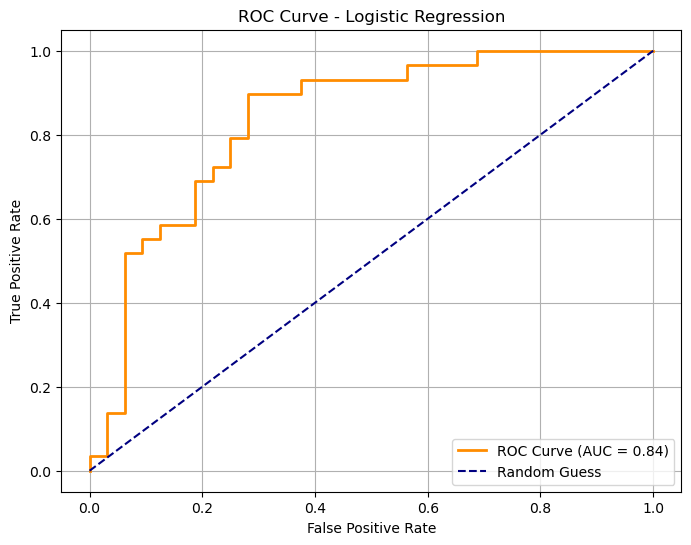

AUC Score: 0.8362


In [34]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
y_prob = best_logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print(f"AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8360655737704918
Confusion Matrix:
 [[25  7]
 [ 3 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                       cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
print("Best Hyperparameters:\n", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters:
 {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

Test Accuracy: 0.8360655737704918
Confusion Matrix:
 [[25  7]
 [ 3 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



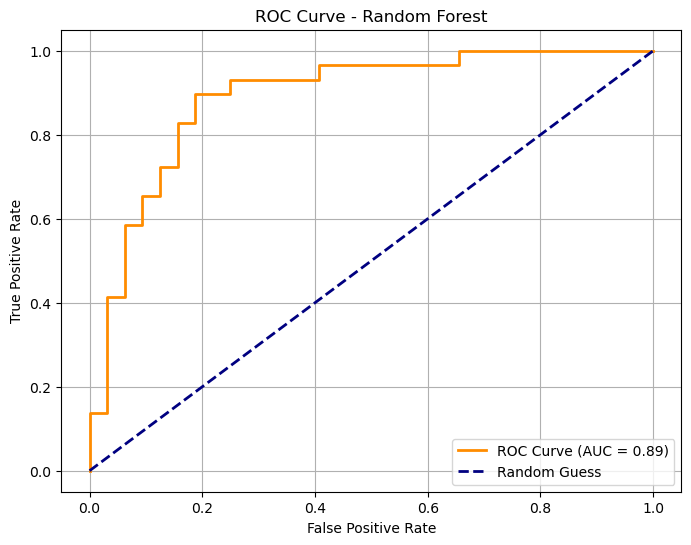

AUC Score: 0.8912


In [41]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
print(f"AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

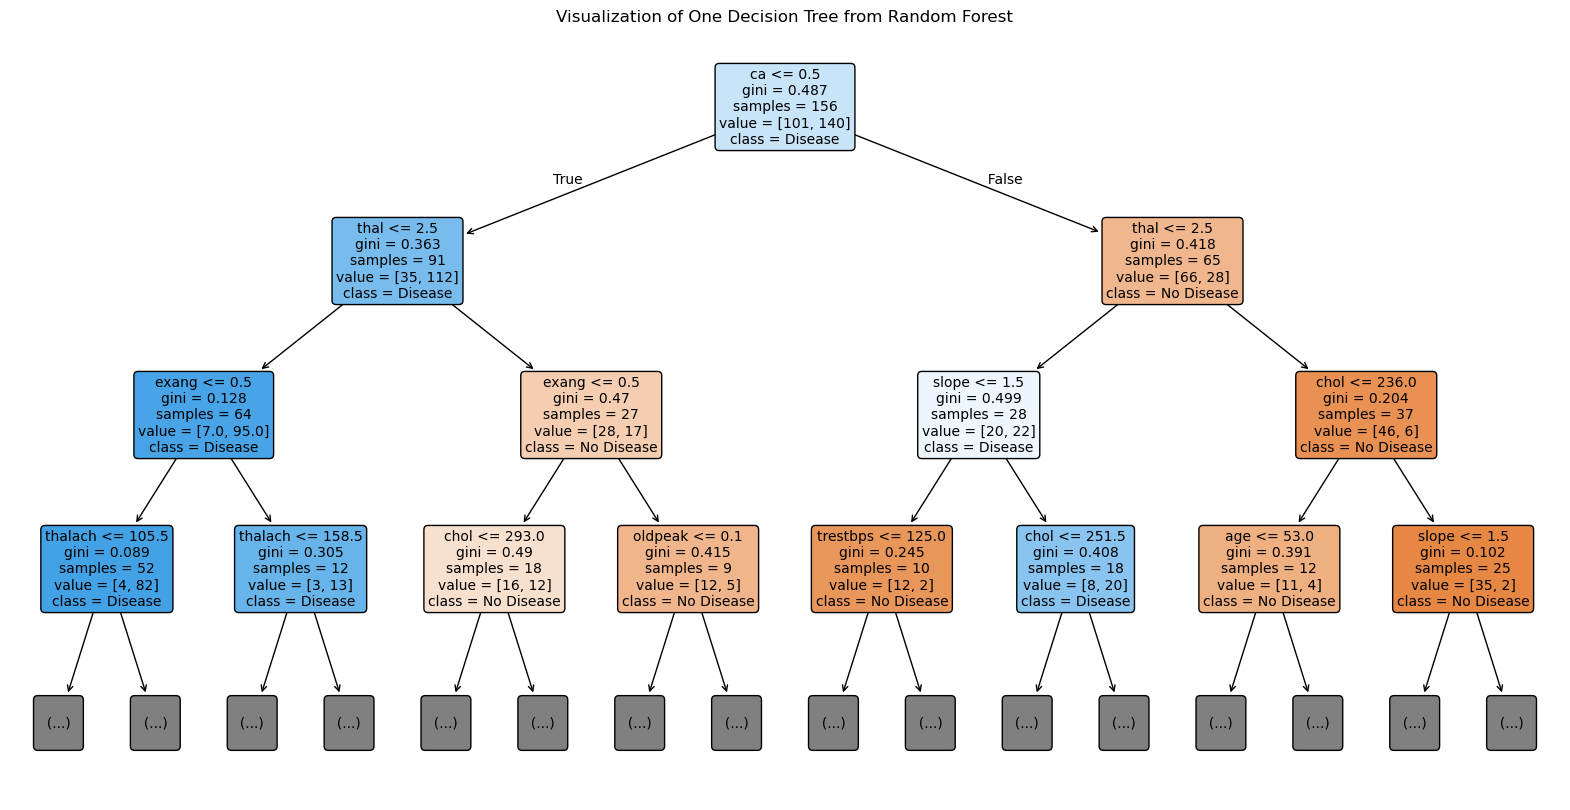

In [61]:
from sklearn.tree import plot_tree
estimator = best_rf.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(estimator,
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True,
          rounded=True,
          max_depth=3,
          fontsize=10)

plt.title("Visualization of One Decision Tree from Random Forest")
plt.show()

In [44]:
new_data = pd.DataFrame([{
    'age': 54,
    'sex': 1,            # 1 = male
    'cp': 0,             # chest pain type
    'trestbps': 130,     # resting blood pressure
    'chol': 246,         # serum cholesterol
    'fbs': 0,            # fasting blood sugar
    'restecg': 1,        # resting ECG
    'thalach': 150,      # max heart rate
    'exang': 0,          # exercise-induced angina
    'oldpeak': 1.0,      # ST depression
    'slope': 2,          # slope of peak exercise ST
    'ca': 0,             # number of major vessels
    'thal': 2            # thalassemia
}])

In [59]:
logreg_pred = best_logreg.predict(new_data)[0]
logreg_prob = best_logreg.predict_proba(new_data)[0][1]


dt_pred = best_dt.predict(new_data)[0]
dt_prob = best_dt.predict_proba(new_data)[0][1]


rf_pred = best_rf.predict(new_data)[0]
rf_prob = best_rf.predict_proba(new_data)[0][1]


print("Logistic Regression:     Prediction =", logreg_pred, "| Probability =", round(logreg_prob, 3))
print("Decision Tree:           Prediction =", dt_pred, "| Probability =", round(dt_prob, 3))
print("Random Forest:           Prediction =", rf_pred, "| Probability =", round(rf_prob, 3))


Logistic Regression:     Prediction = 1 | Probability = 0.537
Decision Tree:           Prediction = 0 | Probability = 0.429
Random Forest:           Prediction = 1 | Probability = 0.645
